In [1]:
%matplotlib inline
import cv2 as cv
from ipywidgets import widgets, fixed

from matplotlib import pyplot as plt


In [2]:
image = cv.imread('../imgs/lenna.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)


In [3]:
import numpy as np
from ipywidgets import interact
%matplotlib inline

alpha_slider = widgets.FloatSlider(min=0, max=10, value=1, step=0.1)
beta_slider = widgets.FloatSlider(min=0, max=255, value=0, step=1)
gamma_slider = widgets.FloatSlider(min=0.001, max=5, value=1, step=0.05)


def adjust_gamma(img: cv.typing.MatLike, gamma: float = 1.0) -> cv.typing.MatLike:
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    inv_game = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_game) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(img, table)


#alhpa - contrast, beta = brightness
@interact(img=fixed(image), alpha=alpha_slider, beta=beta_slider, gamma=gamma_slider)
def adjust_image(img: cv.typing.MatLike, alpha: float, beta: float, gamma: float):
    adjusted_img = cv.convertScaleAbs(img, alpha=alpha, beta=beta)  # f'(i,j) = a * f(i,j) + b
    adjusted_img = adjust_gamma(adjusted_img, gamma)

    hist = cv.calcHist([adjusted_img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
    fig, axs = plt.subplots(2)
    axs[0].imshow(image, cmap='gray')
    axs[1].plot(hist)
    fig.set_size_inches(8, 8)
    axs[0].imshow(adjusted_img, cmap='gray')
    axs[1].plot(hist)
    plt.show()


adjust_image

interactive(children=(FloatSlider(value=1.0, description='alpha', max=10.0), FloatSlider(value=0.0, descriptio…

<function __main__.adjust_image(img: Union[cv2.Mat, numpy.ndarray[Any, numpy.dtype[numpy.generic]]], alpha: float, beta: float, gamma: float)>

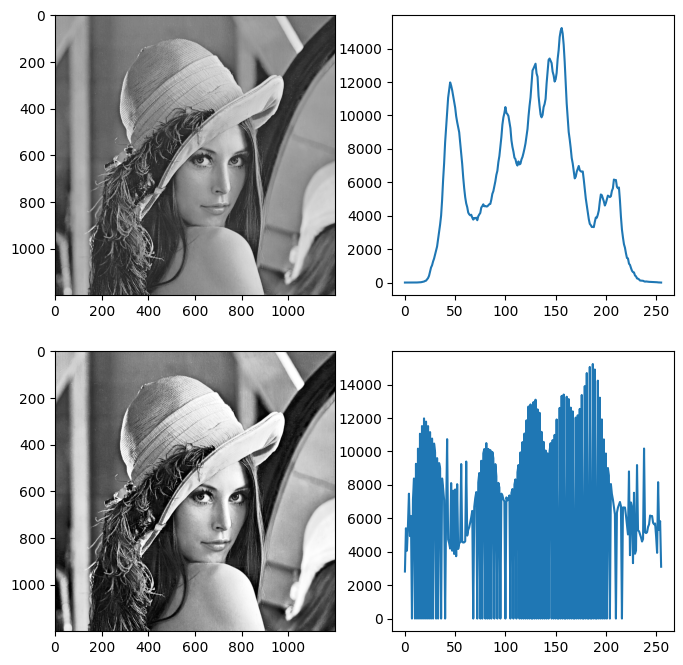

In [4]:
%matplotlib inline

hist = cv.calcHist([image], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

equalized_hist_image = cv.equalizeHist(image)
equalized_hist = cv.calcHist([equalized_hist_image], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

fig, axs = plt.subplots(2, 2)

axs[0][0].imshow(image, cmap='gray')
axs[0][1].plot(hist)

axs[1][0].imshow(equalized_hist_image, cmap='gray')
axs[1][1].plot(equalized_hist)

fig.set_size_inches(8, 8)